In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,pred))

[[125  16]
 [ 12 147]]


In [17]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.91      0.89      0.90       141
          1       0.90      0.92      0.91       159

avg / total       0.91      0.91      0.91       300



In [18]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

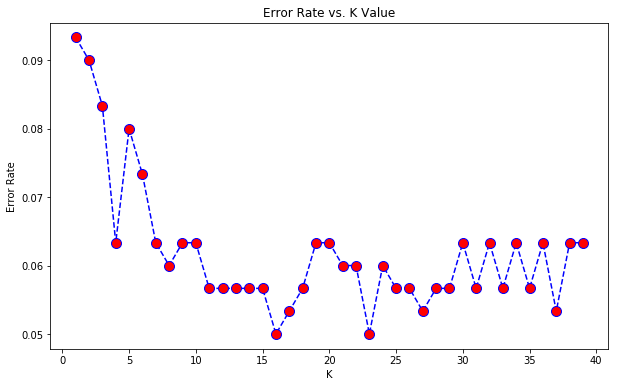

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
# As part of homework was asked to pick  different values k values and view variation of the confusion, and report values

In [37]:
#choosing k neighbor as 15.

In [38]:
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train,y_train)
pred_15 = knn_15.predict(X_test)
print(confusion_matrix(y_test,pred_15))
print(classification_report(y_test,pred_15))

[[129  12]
 [  5 154]]
             precision    recall  f1-score   support

          0       0.96      0.91      0.94       141
          1       0.93      0.97      0.95       159

avg / total       0.94      0.94      0.94       300



In [39]:
#choosing k neighbor as 23.

In [40]:
knn_23 = KNeighborsClassifier(n_neighbors=23)
knn_23.fit(X_train,y_train)
pred_23 = knn_23.predict(X_test)
print(confusion_matrix(y_test,pred_23))
print(classification_report(y_test,pred_23))

[[128  13]
 [  2 157]]
             precision    recall  f1-score   support

          0       0.98      0.91      0.94       141
          1       0.92      0.99      0.95       159

avg / total       0.95      0.95      0.95       300



In [41]:
#choosing k neighbor as 24

In [42]:
knn_24 = KNeighborsClassifier(n_neighbors=24)
knn_24.fit(X_train,y_train)
pred_24 = knn_24.predict(X_test)
print(confusion_matrix(y_test,pred_24))
print(classification_report(y_test,pred_24))

[[129  12]
 [  6 153]]
             precision    recall  f1-score   support

          0       0.96      0.91      0.93       141
          1       0.93      0.96      0.94       159

avg / total       0.94      0.94      0.94       300

